In [2]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

from selenium import webdriver

from time    import sleep , time
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비
# import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model     import LogisticRegression


from   sklearn.metrics         import accuracy_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from   sklearn.impute          import SimpleImputer





sklearn.__version__

'0.24.2'

In [3]:
print('01. 데이터 로드 - ')
titanic_frm = pd.read_csv('/Users/choijaewoo/ml-data/titanic_train.csv')
titanic_frm.head()

01. 데이터 로드 - 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print('02. 결측값 처리 : Age -> 평균 , Cabin Embarked -> N ')
print('missingno 확인 및 처리 - ')
print('SimpleImputer 사용가능 - ')

02. 결측값 처리 : Age -> 평균 , Cabin Embarked -> N 
missingno 확인 및 처리 - 
SimpleImputer 사용가능 - 


<AxesSubplot:>

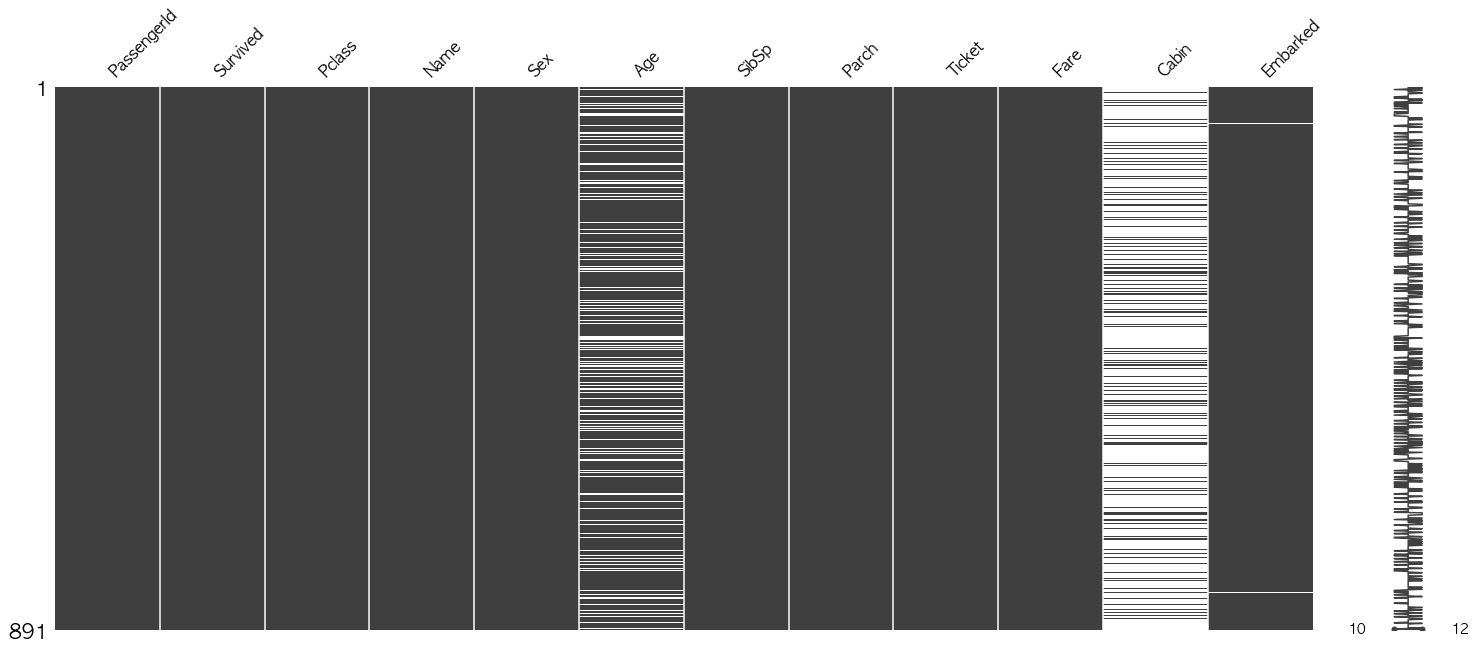

In [6]:
msno.matrix(titanic_frm)

<AxesSubplot:>

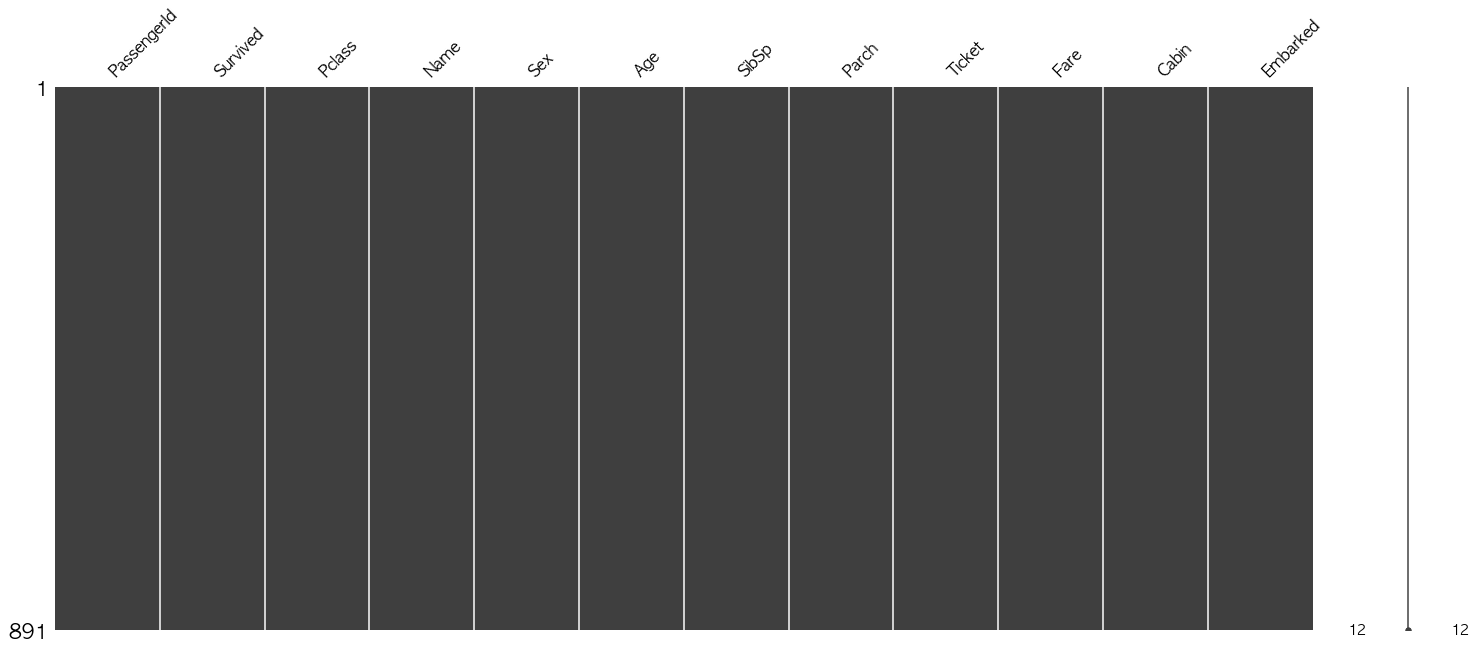

In [9]:
titanic_age_imputer = SimpleImputer(strategy='mean')

titanic_frm['Age'] = titanic_age_imputer.fit_transform(titanic_frm[['Age']])

titanic_frm['Cabin'] = titanic_frm['Cabin'].fillna('N')
titanic_frm['Embarked'] = titanic_frm['Embarked'].fillna('N')
msno.matrix(titanic_frm)

In [10]:
print('EDA - ')
print('03. 성별에 따른 생존여부 확인을 위한 barplot 시각화(seaborn) - ')
print('성별에따른 시각화 , 성별에 따른 선실별 , 성별에 따른 선실별 그룹과 누적')
print('subplot - (1,3)')


EDA - 
03. 성별에 따른 생존여부 확인을 위한 barplot 시각화(seaborn) - 
성별에따른 시각화 , 성별에 따른 선실별 , 성별에 따른 선실별 그룹과 누적
subplot - (1,3)


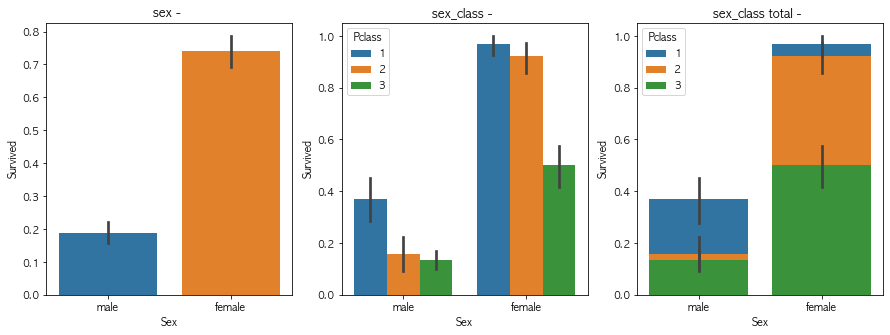

In [11]:
fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(1,3,1)
ax02 = fig.add_subplot(1,3,2)
ax03 = fig.add_subplot(1,3,3)

ax01.set_title('sex - ')
ax02.set_title('sex_class - ')
ax03.set_title('sex_class total - ')

sns.barplot(ax = ax01, data = titanic_frm, x = 'Sex', y='Survived')

sns.barplot(ax = ax02, data = titanic_frm, x = 'Sex', y='Survived', hue = 'Pclass')

sns.barplot(ax = ax03, data = titanic_frm, x = 'Sex', y='Survived', hue = 'Pclass', dodge = False)


plt.show()
plt.close()

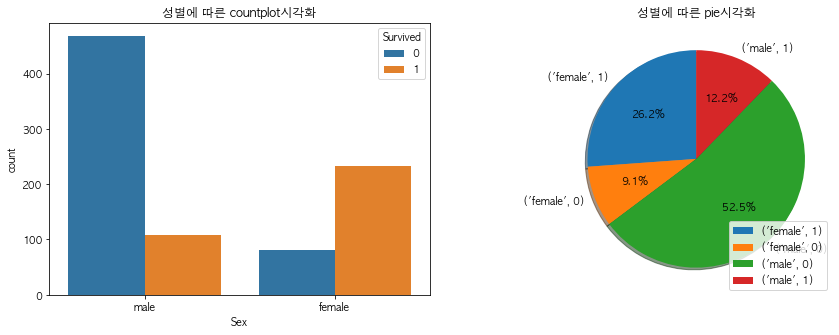

In [12]:
fig= plt.figure(figsize=(15,5))
ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

sns.countplot(ax=ax01, data=titanic_frm, x='Sex',hue='Survived')

ax02.pie(titanic_frm.groupby('Sex')['Survived'].value_counts(),
         labels     = titanic_frm.groupby('Sex')['Survived'].value_counts().index,
         autopct    = '%1.1f%%',
         startangle = 90 ,
         shadow     = True
        )

ax01.set_title('성별에 따른 countplot시각화')
ax02.set_title('성별에 따른 pie시각화')


plt.legend(loc='best')

plt.show()
plt.close()


In [13]:
print('EDA - ')
print('04. 성별에 따른 생존자 수를 수치로 비교 - groupby ')

titanic_frm.groupby(['Sex' , 'Survived'])['Survived'].count().to_frame()

EDA - 
04. 성별에 따른 생존자 수를 수치로 비교 - groupby 


Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

In [14]:
print('04. Age , Cabin , Embarked 값의 분포 - value_counts() ')
print()
print('Sex - ')
print(titanic_frm['Sex'].value_counts() )
print()
print('Cabin - ')
print(titanic_frm['Cabin'].value_counts() )
print()
print('Embarked - ')
print(titanic_frm['Embarked'].value_counts() )

04. Age , Cabin , Embarked 값의 분포 - value_counts() 

Sex - 
male      577
female    314
Name: Sex, dtype: int64

Cabin - 
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked - 
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64
